# Surface waves

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, animation
from matplotlib.gridspec import  GridSpec #for multiple sub(plots)
#plt.style.use('ggplot') #plotting style like in R
import matplotlib.animation
from IPython.display import display, clear_output

In [2]:
pi = np.pi
#x = np.linspace(0,2*pi,100)
t = np.arange(0,51,0.5) #0:512;
x = np.arange(0,2*pi,0.1) #0:0.1:2*pi;
#XX, YY = np.meshgrid(xx,yy)        
k=2.0 #wavenumber
amp = 0.2 #amplitude
lam = 2.0*pi/k #lambda-> wavelength
g = 9.8 #m/s
H = 0.65*lam  #m 
#
omg = np.sqrt(g*k*np.tanh(k*H))
omg1 = omg # used to change direction of propagation
#
Lx = np.size(x) #length(x);
Lt = np.size(t) #length(t);
#
eta = np.zeros((Lx,Lt))
Lt

102

In [3]:
for ii in range(0,Lx): #ii = 1:Lx
    for m in range(0,Lt): #m = 1:length(t)
        eta[ii,m] = amp*np.cos(k*x[ii]-omg1*t[m]) # amp*cosf(i,m)
        #print(amp*np.cos(k*x[ii]-omg*t[m]))  
        #print(eta[ii,m])
        
# fig, ax = plt.subplots(figsize=(5,3))
# tm=0
# ax.plot(x,eta[:,tm],color='black',linestyle='-')
# tm=10
# ax.plot(x,eta[:,tm],color='red',linestyle='-')
# tm=20
# ax.plot(x,eta[:,tm],color='blue',linestyle='-')
# plt.xlim(0, x[-1])
# plt.ylim(-H,np.max(np.max(eta)))

In [4]:
z = np.arange(-H,np.max(np.max(eta)),0.05) #-H:0.05:max(max(eta))
Lz = np.size(z) #length(z)

phi = np.zeros((Lx,Lz,Lt)) #zeros(Lx,Lz,Lt)
U   = np.zeros((Lx,Lz,Lt)) #zeros(Lx,Lz,Lt)
W   = np.zeros((Lx,Lz,Lt)) #zeros(Lx,Lz,Lt)

In [5]:
for m in range(0,Lt): #1:Lt
    for ii in range(0,Lx):  #1:Lx
        for jj in range(0,Lz): #jj=1:Lz
            phi[ii,jj,m] =((amp*omg/k)*np.cosh(k*(z[jj]+H))/(np.sinh(k*H)))*np.sin(k*x[ii]-omg1*t[m])
            U[ii,jj,m]   =(amp*omg*np.cosh(k*(z[jj]+H))/(np.sinh(k*H)))*np.cos(k*x[ii]-omg1*t[m])
            W[ii,jj,m]   =(amp*omg*np.sinh(k*(z[jj]+H))/(np.sinh(k*H)))*np.sin(k*x[ii]-omg1*t[m])        
        

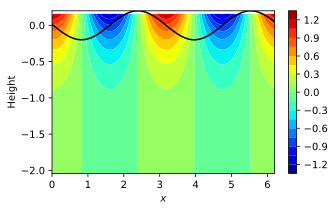

In [6]:
#This cell takes a while to execute
tm = 5
UU = np.transpose(U[:,:,tm]) #squeeze(U(:,:,tm))'
WW = np.transpose(W[:,:,tm]) #squeeze(W(:,:,tm))'
PP = np.transpose(phi[:,:,tm])
##Plot contour
fig, ax = plt.subplots(figsize=(5,3))
xc=plt.contourf(x, z, WW, 16,cmap='jet') #RdGy -> Red-Grey colormap
plt.colorbar()
#fig.colorbar(xc,ax)
##Plot eta -- displacement
ax.plot(x,eta[:,tm],color='black',linestyle='-')
plt.xlim(0, x[-1])
plt.ylim(-H,np.max(np.max(eta)))
ax.set_xlabel('$x$', color='k')
ax.set_ylabel('Height', color='k')
         
plt.show()

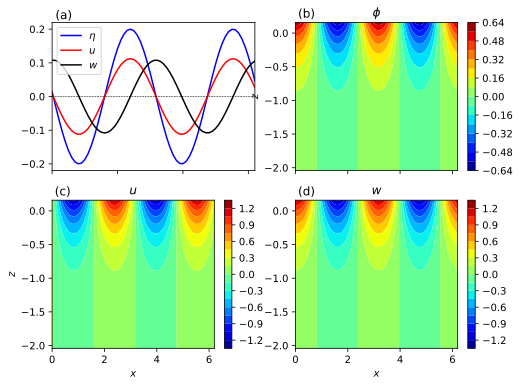

In [7]:
fig, axes = plt.subplots(2,2,figsize=(8, 6), sharex=True, sharey=False)
## Set the title for the figure
# fig.suptitle('This is the Figure Title', fontsize=15)
## Top Left Subplot
eta1, =axes[0,0].plot(x,eta[:,tm],color='blue',linestyle='-')
u1,   =axes[0,0].plot(x,U[:,20,tm],color='red',linestyle='-')
w1,   =axes[0,0].plot(x,W[:,20,tm],color='black',linestyle='-')
axes[0,0].axhline(y=0,color='black',lw=0.5,linestyle='--')#or with x-range
#axes[0,0].set_title('$\phi$')
axes[0,0].legend((eta1,u1,w1), ('$\eta$', '$u$','$w$'))
#axes[0,0].text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#         verticalalignment='center', transform=ax.transAxes)
#
img1 = axes[0,1].contourf(x, z,PP, 16,cmap='jet')
axes[0,1].set_title('$\phi$')
axes[0,1].set_ylabel('$z$')
ax=axes[0,1]
fig.colorbar(img1,ax=ax,orientation='vertical')
## Top Right Subplot
img2=axes[1,0].contourf(x, z, UU, 16,cmap='jet')
axes[1,0].set_title('$u$')
axes[1,0].set_xlabel('$x$')
axes[1,0].set_ylabel('$z$')
ax=axes[1,0]
fig.colorbar(img2,ax=ax,orientation='vertical')
# # Bottom Right Subplot
img3=axes[1,1].contourf(x, z, WW, 16,cmap='jet')
axes[1,1].set_title('$w$')
axes[1,1].set_xlabel('$x$')
ax=axes[1,1]
fig.colorbar(img3,ax=ax,orientation='vertical')
#labels
axes[0,0].text(0.1, 0.23, '(a)',fontsize=12)
axes[0,1].text(0.1, 0.23, '(b)',fontsize=12)
axes[1,0].text(0.1, 0.23, '(c)',fontsize=12)
axes[1,1].text(0.1, 0.23, '(d)',fontsize=12)
#
dirpath ='C:/Users/Owner/Documents/University_of_Ghana/DeptOfMath/Teaching/LECTURE_NOTES/Water_waves/figures/'
#plt.savefig(dirpath + 'figure_sw1.pdf')
##plt.savefig('figure_sw1.pdf')
plt.show()

<IPython.core.display.Javascript object>


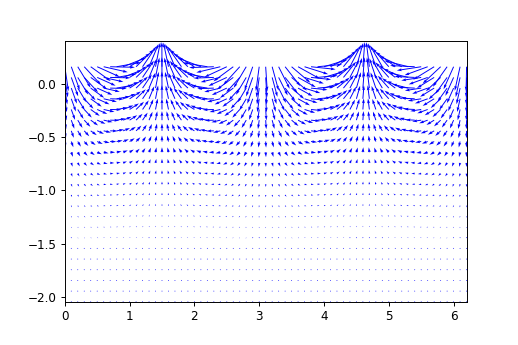

In [9]:
%matplotlib notebook
#for n in range(0,100): #n = 1:10:Lt %0.5:5
n = 0
ix=1; iz=2; #decimate for clearer vectors
Ux = np.transpose(U[:,:,n]) 
Wz = np.transpose(W[:,:,n]) 

Uxx = Ux[::iz,::ix]
Wzz = Wz[::iz,::ix]
    
xm,zm = np.meshgrid(x,z)
xd=xm[::iz,::ix]
zd=zm[::iz,::ix]
    
fig, ax = plt.subplots(figsize=(6,4))
    
pq = ax.quiver(xd,zd, Uxx, Wzz,color='blue')
ax.set_xlim(0.0, np.max(xd))
ax.set_ylim(-H, np.max(np.max(eta))+ 0.2)

def animate_update(j, pq,xd,zd):
    Ux = np.transpose(U[:,:,j]) 
    Wz = np.transpose(W[:,:,j]) 
    Uxx = Ux[::iz,::ix]
    Wzz = Wz[::iz,::ix]
    pq.set_UVC(Uxx, Wzz)
    return pq,

anim = animation.FuncAnimation(fig, animate_update, fargs=(pq,xd,zd),frames=30,interval=500, repeat=True, blit=True)
##anim = animation.FuncAnimation(fig, animate_update,fargs=(pq, xxx,zzz), frames=200)

dirpath = 'C:/Users/Owner/Documents/University_of_Ghana/DeptOfMath/Teaching/PythonStuff/animations/'
#anim.save(dirpath+'animation_surface_wave.gif', writer='imagemagick', fps=1)

#anim.save(dirpath+'animation_surface_wave.mp4',writer="ffmpeg", fps=30)    
plt.show()